In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("../../data/titanic/train.csv",usecols=['Age','Fare','Survived'])

In [18]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [19]:
df.isnull().mean() *100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [20]:
X = df.drop(columns=['Survived'])
y= df['Survived']
X,y

(      Age     Fare
 0    22.0   7.2500
 1    38.0  71.2833
 2    26.0   7.9250
 3    35.0  53.1000
 4    35.0   8.0500
 ..    ...      ...
 886  27.0  13.0000
 887  19.0  30.0000
 888   NaN  23.4500
 889  26.0  30.0000
 890  32.0   7.7500
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# create a new columns
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [23]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipykernel_23018/3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipykernel_23018/309010126

In [24]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,36.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


/tmp/ipykernel_23018/2268009389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train['Age'],label='Original',hist=False)
/tmp/ipykernel_23018/2268009389.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train['Age_imputed'],label='Imputed',hist=False)


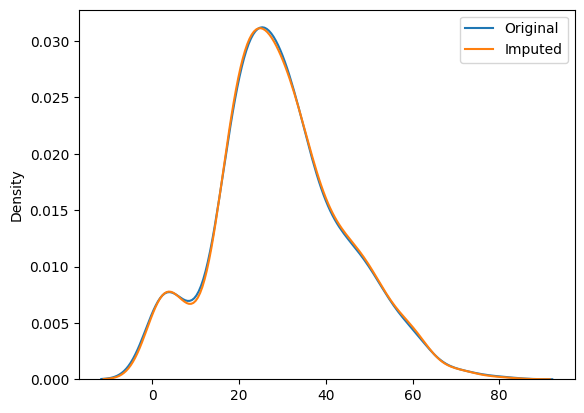

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x=X_train['Age'],label='Original',hist=False)
sns.distplot(x=X_train['Age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [29]:
print("Original Age variance:",X_train['Age'].var())
print("Imputed Age variance:",X_train['Age_imputed'].var())


Original Age variance: 210.2517072477435
Imputed Age variance: 209.23800376428198


In [30]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,46.293157
Age,71.580633,210.251707,210.251707
Age_imputed,46.293157,210.251707,209.238004
